# 线性回归 调用API

## 导入包

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #线性回归
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

## 数据集分割
X是前13列特征，y是房价

Boston = load_boston()
X = Boston.data  
y = Boston.target

分割测试集，训练集，比例为1：4

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=888)

In [6]:
X_train.shape

(404, 13)

In [7]:
y_train.shape

(404,)

## 回归预测

In [8]:
lin_reg = LinearRegression()

在训练集拟合

In [9]:
lin_reg.fit(X_train,y_train)

LinearRegression()

对测试集评估

In [10]:
lin_reg.score(X_test,y_test)

0.755893222063329

对测试集的特征预测得到的房价

In [34]:
test_pred = lin_reg.predict(X_test)
test_pred

array([22.17123289, 35.55703211, 20.8943971 , 20.19609888, 20.02689174,
       21.21700868, 30.82764123, 28.81457412, 24.62625139, 12.51737207,
       21.66809395, 26.01419263, 20.34518116, 23.2663366 , 22.11437669,
       13.07554361, 17.13768497, 21.97900546, 27.3708199 , 28.01916788,
       24.41448177, 34.36001821, 23.94274892, 26.83103321, 33.1323688 ,
       13.13104618, 20.66162225, 17.3953725 , 24.90599552, 25.93687134,
       25.43031713, 24.81956864, 17.66949657, 13.13904413, 22.14029635,
       35.50302904, 16.23087515, 19.89717175, 23.06369597, 20.00735812,
       32.84777096, 25.7275347 , 30.95015644, 23.70226829, 21.41232494,
       13.11049316, 33.15680287, 20.24535073, -5.21091931, 27.52962052,
       25.0985891 , 13.96531508, 14.09019168, 27.38604613, 14.21771639,
       25.46457847, 17.74201965, 19.33771417, 35.67022047, 26.05415131,
       32.57600176, 24.56533259, 31.75366611, 28.13798769, 31.05895476,
       24.53318847, 23.37137553, 30.55484544, 32.28276335, 20.87

真实的房价

In [15]:
y_test

array([22.4, 32.4, 21.7, 24.5, 16.8, 21.1, 29.4, 28.7, 21.5, 13.6, 21.4,
       24.8, 16.8, 19.4, 21.7, 17.2, 17.1, 18.7, 22.3, 25. , 24.4, 34.6,
       20.1, 22.3, 26.7, 15.6, 19.5, 14.3, 22.7, 21.6, 25. , 24.7, 17.8,
       12.7, 22.7, 46.7, 20.2, 27.1, 25. , 19.9, 32. , 23.2, 32.2, 19.2,
       21. , 13.4, 31.6, 16.7,  7. , 24.5, 24.2, 11.5, 10.9, 22. , 15.7,
       25.3, 14.9, 15. , 33.4, 28.7, 50. , 25. , 29.9, 26.6, 28.7, 20.5,
       23. , 37. , 30.3, 16.2, 22.2, 19.9, 36. , 48.5, 26.4, 19.8, 17.8,
       38.7, 11.7, 13.8, 15.2, 30.1,  8.1, 30.1, 24. , 17.8, 13.8,  7.5,
       41.3, 20.1, 13.9, 50. , 20.3, 22.6, 25. , 20.5, 12.8, 19.5, 22. ,
       19.1, 24.6, 50. ])

## 模型评估
计算MSE

In [20]:
# 残差
deviation = lin_reg.predict(X_test) - y_test

In [21]:
MSE = np.sum(np.sqrt(deviation * deviation))/102
MSE

3.143244028934462

## 数据可视化

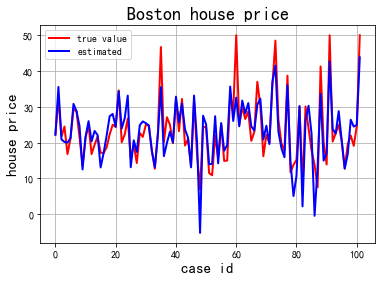

In [35]:
import matplotlib as mpl
#对测试集上的标注值与预测值进行可视化呈现   
t = np.arange(len(y_test))
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.plot(t, y_test, 'r-', lw=2, label=u'true value')
plt.plot(t, test_pred, 'b-', lw=2, label=u'estimated')
plt.legend(loc = 'best')
plt.title(u'Boston house price', fontsize=18)
plt.xlabel(u'case id', fontsize=15)
plt.ylabel(u'house price', fontsize=15)
plt.grid()
plt.show()